In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
sns.set()


In [3]:
#Reading the data from the dataset
data=pd.read_csv("cardio_train.csv",sep=';')
data.head()#seeing the first 10 records
#data.tail(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
data.shape

(69301, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
data=pd.DataFrame(data=data,dtype=np.int64)
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69,130,80,2,2,0,0,1,0
1,989,14648,1,163,71,110,70,1,1,0,0,1,1
2,990,21901,1,165,70,120,80,1,1,0,0,1,0
3,991,14549,2,165,85,120,80,1,1,1,1,1,0
4,992,23393,1,155,62,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72,135,80,1,2,0,0,0,1


In [8]:
data.dtypes

id             int64
age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object

In [9]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.201671,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383654,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


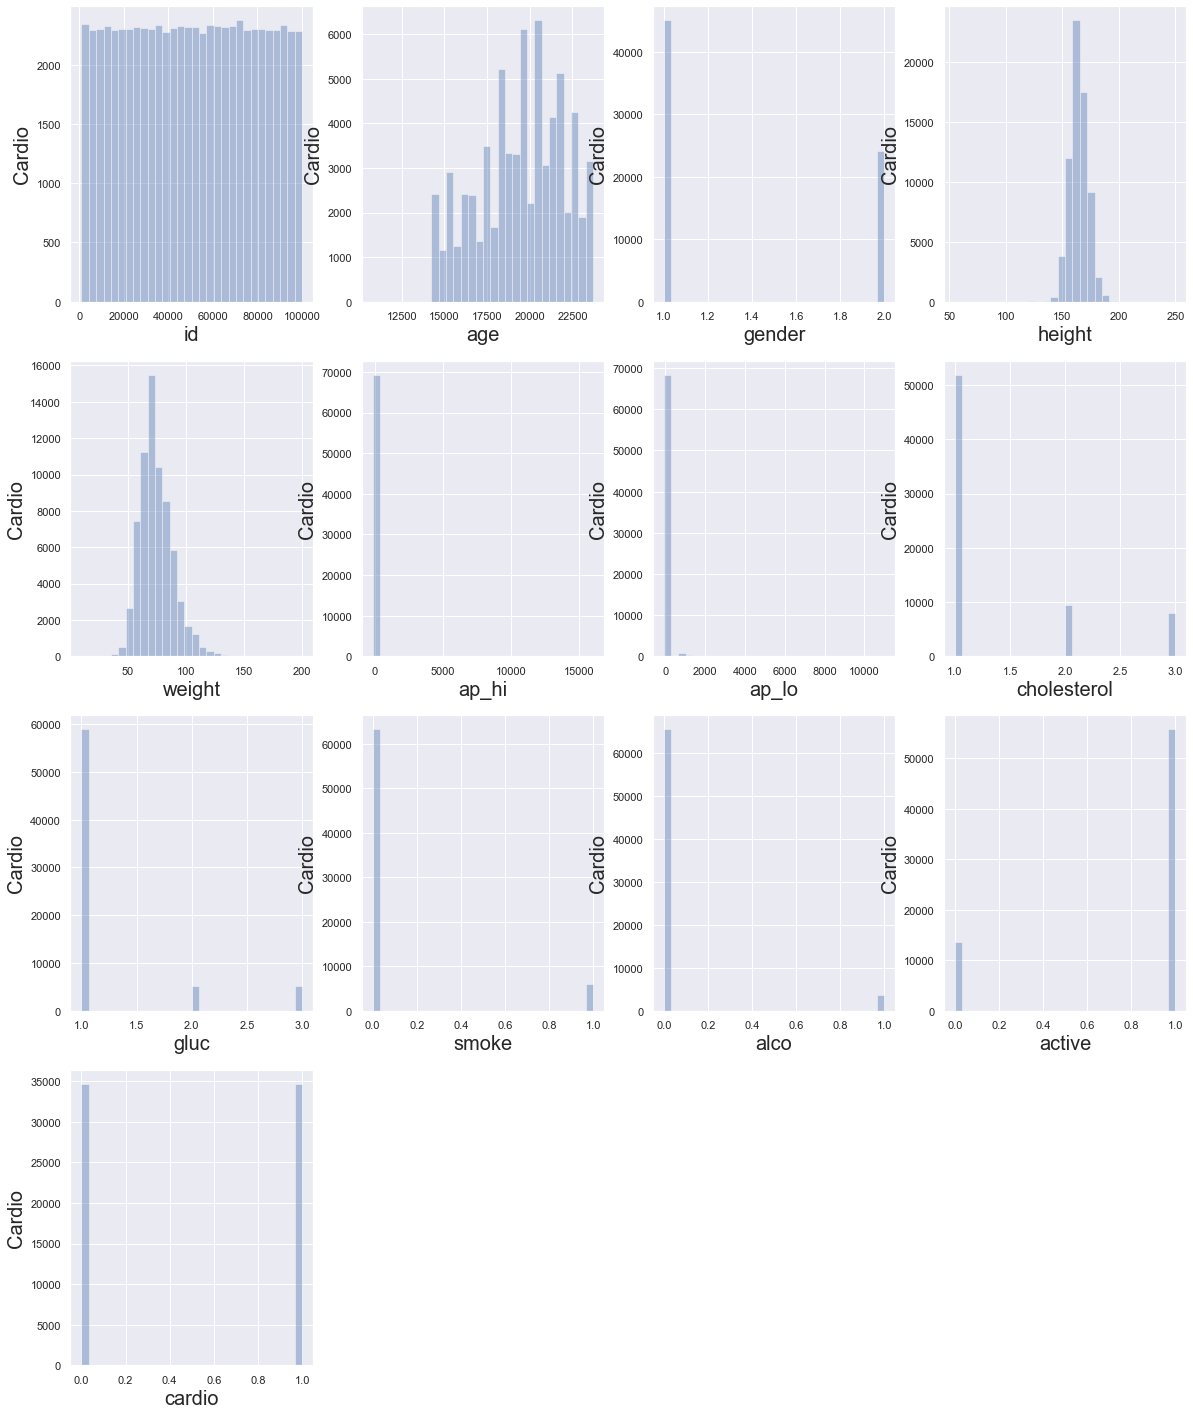

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

#col=data.columns
#col

for col in data:
    if plotnumber<=13 :     # as there are 13 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[col],kde = False, hist = True, rug= False, bins= 30)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Cardio',fontsize=20)
    plotnumber+=1
plt.show()

In [12]:
col=data.columns
col

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [13]:
import pandas as pd
import numpy as np


data.applymap(np.isreal)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,True,True,True,True,True,True,True,True,True,True,True,True,True
69297,True,True,True,True,True,True,True,True,True,True,True,True,True
69298,True,True,True,True,True,True,True,True,True,True,True,True,True
69299,True,True,True,True,True,True,True,True,True,True,True,True,True


In [14]:
np.argmin(data.applymap(np.isreal).all(1))

0

In [15]:
#data
print (data[data['cardio'].apply(lambda x: isinstance(x, str))])


Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


In [16]:
data[~data.applymap(np.isreal).all(1)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [17]:
data.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

id             True
age            True
gender         True
height         True
weight         True
ap_hi          True
ap_lo          True
cholesterol    True
gluc           True
smoke          True
alco           True
active         True
cardio         True
dtype: bool

In [18]:
#Separating the feature and the Label columns 
x=data.drop(labels='cardio', axis=1)
y= data['cardio']

In [19]:
x.sample(n=5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
47972,69506,19630,1,155,57,120,80,3,3,0,0,1
57624,83225,21941,1,156,70,130,90,1,1,0,0,1
1028,2445,18931,2,175,80,120,80,1,1,1,0,1
15481,23109,20519,2,170,65,130,80,1,1,0,0,1
68304,98574,14552,2,175,74,140,80,1,1,0,0,1


In [20]:
y

0        0
1        1
2        0
3        0
4        0
        ..
69296    0
69297    1
69298    1
69299    1
69300    0
Name: cardio, Length: 69301, dtype: int64

In [21]:
# as the datapoints differ a lot in magnitude, we'll scale them
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_data=scaler.fit_transform(x)

In [22]:
scaled_data

array([[-1.73243929,  1.21601824, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.73240428, -1.95391548, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.73236927,  0.98580185, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [ 1.7338761 , -0.16325352,  1.36421285, ..., -0.31072844,
         4.19040018, -2.02525646],
       [ 1.73394612,  1.20061644, -0.73302344, ..., -0.31072844,
        -0.23864069, -2.02525646],
       [ 1.73398113,  0.43417421, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463]])

In [23]:
#checking for imbalanced data.
data['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [24]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(scaled_data,i) for i in range(scaled_data.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.000154,id
1,1.038238,age
2,1.458693,gender
3,1.440496,height
4,1.133151,weight
5,1.001815,ap_hi
6,1.002887,ap_lo
7,1.299197,cholesterol
8,1.261153,gluc
9,1.246585,smoke


In [25]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data,y, test_size= 0.25)

In [26]:
x_train

array([[ 1.70425725,  1.04659843, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [ 0.41510218,  0.10870985, -0.73302344, ..., -0.31072844,
        -0.23864069, -2.02525646],
       [-0.8948141 ,  0.66236404, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [ 0.85595386, -1.97093852, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [ 1.24337958, -0.45629304,  1.36421285, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-0.465971  ,  0.710596  , -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463]])

In [27]:
x_test

array([[ 1.14944653,  0.35594928,  1.36421285, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-0.01030989, -0.48669133, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [ 0.00670519, -0.4700736 ,  1.36421285, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [ 1.47857984,  1.01660545,  1.36421285, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.52710296, -1.93891899,  1.36421285, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [ 0.11317199, -0.01977359, -0.73302344, ..., -0.31072844,
         4.19040018,  0.49376463]])

In [28]:
y_train

68713    0
42921    1
16740    1
34061    0
34987    0
        ..
57205    1
58485    1
51823    0
59530    1
25323    1
Name: cardio, Length: 51975, dtype: int64

In [29]:
y_test

57676    1
34423    0
34771    1
45487    1
4645     1
        ..
2459     0
2893     0
64253    1
4137     0
36912    1
Name: cardio, Length: 17326, dtype: int64

In [30]:
x_train,x_test,y_train,y_test

(array([[ 1.70425725,  1.04659843, -0.73302344, ..., -0.31072844,
         -0.23864069,  0.49376463],
        [ 0.41510218,  0.10870985, -0.73302344, ..., -0.31072844,
         -0.23864069, -2.02525646],
        [-0.8948141 ,  0.66236404, -0.73302344, ..., -0.31072844,
         -0.23864069,  0.49376463],
        ...,
        [ 0.85595386, -1.97093852, -0.73302344, ..., -0.31072844,
         -0.23864069,  0.49376463],
        [ 1.24337958, -0.45629304,  1.36421285, ..., -0.31072844,
         -0.23864069,  0.49376463],
        [-0.465971  ,  0.710596  , -0.73302344, ..., -0.31072844,
         -0.23864069,  0.49376463]]),
 array([[ 1.14944653,  0.35594928,  1.36421285, ..., -0.31072844,
         -0.23864069,  0.49376463],
        [-0.01030989, -0.48669133, -0.73302344, ..., -0.31072844,
         -0.23864069,  0.49376463],
        [ 0.00670519, -0.4700736 ,  1.36421285, ..., -0.31072844,
         -0.23864069,  0.49376463],
        ...,
        [ 1.47857984,  1.01660545,  1.36421285, ..., -

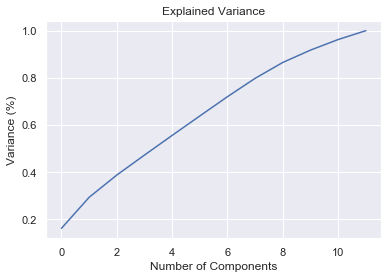

In [31]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca = PCA()
principalComponents = pca.fit_transform(scaled_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [32]:
pca = PCA(n_components=11)
new_data = pca.fit_transform(scaled_data)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11'])

In [33]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11
0,1.379748,1.831534,-0.677688,-0.001919,-1.632725,-0.222644,0.641778,-0.656182,-0.340927,0.038880,0.369694
1,0.651684,-1.260079,-0.131868,-0.237782,-1.636999,-0.643773,0.748515,1.543937,0.401799,0.092623,-0.022281
2,0.750060,-0.337067,0.114655,0.194405,-1.604785,-0.312072,0.622740,-1.111857,0.098156,-0.149512,0.229227
3,-4.052294,-1.220507,-3.494728,0.128649,-1.816845,0.532930,0.255632,1.107870,1.617403,0.009432,0.196891
4,1.597716,-0.220452,-0.567083,0.361185,-1.627642,-0.045098,0.499629,-1.700611,-0.167525,0.021257,0.261667
...,...,...,...,...,...,...,...,...,...,...,...
69296,-2.394587,-0.829582,-0.985389,0.168482,1.718980,-0.091322,-0.303960,-0.411466,-0.794720,2.191536,0.341189
69297,-0.030783,2.923817,1.102117,0.285156,1.696746,-0.620684,-0.149398,-0.552591,2.517880,1.003940,0.755885
69298,-3.888523,1.750926,-0.007294,-0.389185,1.471638,1.957337,-1.168858,0.552414,2.240872,-2.643468,-2.094553
69299,0.875374,0.938282,0.590756,-0.547192,1.500481,1.728499,-1.226074,-0.455486,-0.214041,-0.222464,1.384944


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [35]:
log_clf = LogisticRegression()

In [36]:
rnd_clf = RandomForestClassifier()

In [37]:
svm_clf = SVC()

In [38]:
X_train,x_test,Y_train,y_test = train_test_split(principal_x,y,test_size=.30,random_state=41)

In [39]:
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('sc',svm_clf)],voting='hard')

In [40]:
voting_clf.fit(X_train,Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('sc', SVC())])

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
for clf in (log_clf,rnd_clf,svm_clf):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
    

LogisticRegression 0.7171372228368044
RandomForestClassifier 0.7013130681544899
SVC 0.7273339425713049


In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
#param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1.0,0.5,0.1,0.01,0.001]}

In [47]:
param_grid={'C':[1,10,50],'gamma':[1.0,0.1,0.01]}

In [48]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [49]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 54.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 205.3min finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50], 'gamma': [1.0, 0.1, 0.01]},
             verbose=3)

In [50]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [53]:
SVMmodel_new=SVC(C=10, gamma=0.01)
SVMmodel_new.fit(X_train,Y_train)

SVC(C=10, gamma=0.01)

In [54]:
y_pred=SVMmodel_new.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred)

0.7354624597181473

In [56]:
import pickle

In [57]:
# saving the model to the local file system
"""from joblib import dump, load
filename = 'test1.joblib'
dump(svr_new, filename) """
filename = 'finalized_SVMmodel.pickle'
pickle.dump(SVMmodel_new, open(filename, 'wb'))

In [60]:
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[23393,1,155,62,120,80,1,1,0,0,1]]))
print(prediction[0])

0
